# Sprint 2 Instacart Data Project

For this project, we are working with a dataset from 2017 released by Instacart. Instacart is a grocery delivery platform where customers can order groceries and have it delivered to their homes.

We will filter through and clean the data, removing duplicates and replacing missing values in each dataframe that we will create from the provided csv files filled with data.

In [1]:
import pandas as pd

In [2]:
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_instacart_orders.sample(10)
# We will assume that the order_dow column orders the days of the week from 0-6 with Sunday being 0 and Saturday being 6
# We will assume that the order_hour_of_day also represents a 24 hour range, with 0 representing 12:00AM and 23 representing 11:00PM

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
130585,3098338,193351,29,3,18,10.0
136176,3276426,136170,1,4,8,NaN
426359,2055419,122221,4,2,13,30.0
290568,588930,89841,18,5,16,5.0
289273,871565,200581,19,5,11,27.0
229682,3254971,65373,9,3,8,9.0
286584,740815,128376,8,2,20,8.0
15013,1943234,113432,92,4,8,3.0
65161,1265646,159829,5,0,17,30.0
459761,214710,18737,6,2,6,7.0


In [3]:
df_products = pd.read_csv('/datasets/products.csv',sep=';')
df_products.sample(10)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [5]:
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
df_instacart_orders.duplicated().sum()


15

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
df_filtered_wed_orders = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]
df_filtered_wed_orders.duplicated().sum()


15

In [9]:
# Remove duplicate orders
df_instacart_orders = df_instacart_orders.drop_duplicates()

In [10]:
# Double check for duplicate rows
df_instacart_orders.duplicated().sum()

0

In [11]:
# Double check for duplicate order IDs only
df_instacart_orders['order_id'].duplicated().sum()

0

If we follow our previous assumptions for the order_dow and order_hour_of_day columns, we can use logical comparisons to filter our data to check for all orders placed on Wednesday at 2:00AM .order_dow values that = 3 (Wed.) and order_hour_of_day values that = 2 (2:00AM). When we run the duplicate().sum() methods, it shows us that all our duplicated orders happened on this day and at this specific time of Wednesday 2:00AM because it matches with the same method call on our unfilitered dataframe for instacart_orders.

Now that we now that all of our duplicates happened on Wednesday at 2:00AM when can safely remove the duplicate orders using drop_duplicates() method on the instacart_orders dataframe and double check it by running duplicates().sum() on the order_id column to make sure there aren't anymore duplicate orders in our dataframe.

### `products` data frame

In [12]:
# Check for fully duplicate rows
df_products.duplicated().sum()

0

In [13]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name'].duplicated().sum()

1361

In [15]:
# Check for duplicate product names that aren't missing
product_names_not_missing = df_products[~(df_products['product_name'].isna()) & (df_products['product_name'].str.lower().duplicated())]
print(product_names_not_missing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2058 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     104 non-null    int64 
 1   product_name   104 non-null    object
 2   aisle_id       104 non-null    int64 
 3   department_id  104 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.1+ KB
None


For the products dataframe, we check for any rows that have all of the same column values. When then check to see if there are any products that share the same ID. Next we check to see if there are products with the same product name. It turns out that we have 1361 product IDs with the same product name. Lastly, we check to see if we have any product names that are duplicate that do not have missing values.

### `departments` data frame

In [16]:
#Check for duplicate departments IDs
df_departments['department_id'].duplicated().sum()

0

In [17]:
#Check for duplicate departments
df_departments['department'].duplicated().sum()

0

Here I checked if there were any duplicated departments ids and did another check for duplicated department names. Both luckily returned no duplicated data.

### `aisles` data frame

In [18]:
# Check for duplicate aisle IDs
df_aisles['aisle_id'].duplicated().sum()

0

In [19]:
# Check for duplicate aisle names
df_aisles['aisle'].duplicated().sum()

0

Here I checked if there were any duplicated aisle IDs and did another check for duplicated aisle names. The aisles dataframe also returned no duplicated data.

### `order_products` data frame

In [20]:
# Check for fully duplicate rows
df_order_products.duplicated().sum()

0

In [21]:
# Double check for any other tricky duplicates
duplicates = df_order_products.duplicated(subset=['order_id', 'product_id'], keep=False)
df_order_products[duplicates].sort_values(by=['order_id', 'product_id'])
print(df_order_products[duplicates])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


He I checked for not only duplicated rows, but also used the subset parameter to check for tricky duplicates that may not appear by the method ran for checking for fully duplicated rows. The subset parameter allows us to check for partial duplicates as well.

## Find and remove missing values


### `products` data frame

In [22]:
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [23]:
# Are all of the missing product names associated with aisle ID 100?
df_products.query('product_name != product_name and aisle_id == 100').count()

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

In [24]:
# Are all of the missing product names associated with department ID 21?
df_products.query('product_name != product_name and department_id == 21').count()

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

In [25]:
# What is this ailse and department?
print(df_products.loc[100, 'aisle_id'])
print(df_products.loc[21, 'department_id'])
aisle_name = df_aisles[df_aisles['aisle_id'] == 100]['aisle']
department_name = df_departments[df_departments['department_id'] == 21]['department']
print(aisle_name)
print(department_name)

112
11
99    missing
Name: aisle, dtype: object
20    missing
Name: department, dtype: object


In [26]:
# Fill missing product names with 'Unknown'
df_products['product_name'].fillna(value='Unknown', inplace=True)
df_products.query("product_name == 'Unknown'") .sample(5)

,product_id,product_name,aisle_id,department_id
20724,20725,Unknown,100,21
16542,16543,Unknown,100,21
48662,48663,Unknown,100,21
30180,30181,Unknown,100,21
37855,37856,Unknown,100,21


Here we check for missing values in the entire products dataframe by using the isna() method and sum them all up using the sum() method. This showed that all of the missing values were solely in the product_name column. When we use a query to see where these missing values are for the product_name column, we see that reside in one specific aisle and department. Aisle with id: 100 and department with id: 21. Next we use the IDs to find out the name of the aisle and department, and the filter returned 'missing' for both columns. Now we want to fill in the missing values in the product_name column with 'Unknown' by using the fillna() method.

### `orders` data frame

In [27]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [28]:
# Are there any missing values where it's not a customer's first order?
df_instacart_orders.query("order_number != 0").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


For the orders dataframe, we check if there are any missing values when the order isn't the customer's first order. We run a query where we are searching for values in the order_number column that are 0, and run the .info() on the query to check and see if we have any missing values. The only non-null count value that differed was in the days_since_prior_order column. Which shows that no values are missing in order_number column after the customer's first order.

### `order_products` data frame

In [29]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [30]:
# What are the min and max values in this column?
print(df_order_products['add_to_cart_order'].max())
print(df_order_products['add_to_cart_order'].min())

64.0
1.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_orders_ids = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_orders_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [32]:
# Do all orders with missing values have more than 64 products?
order_counts = df_order_products.groupby('order_id').size()
large_orders = order_counts[order_counts > 64].index.values
all_orders_over_64 = all(order_id in large_orders for order_id in missing_orders_ids)
print(f"All orders with missing 'add_to_cart_order' have more than 64 products: {all_orders_over_64}")

All orders with missing 'add_to_cart_order' have more than 64 products: True


In [33]:
# Replace missing values with 999 and convert column to integer type
for order_id in missing_orders_ids:
    product_count = len(df_order_products[df_order_products['order_id'] == order_id])
    if product_count > 64:
        print(f"Order ID {order_id} has {product_count} products.")

df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

print(df_order_products.query("add_to_cart_order == 999"))

Order ID 2449164 has 76 products.
Order ID 1968313 has 80 products.
Order ID 2926893 has 92 products.
Order ID 1717990 has 86 products.
Order ID 1959075 has 98 products.
Order ID 844733 has 77 products.
Order ID 61355 has 127 products.
Order ID 936852 has 87 products.
Order ID 264710 has 91 products.
Order ID 1564093 has 69 products.
Order ID 129627 has 69 products.
Order ID 293169 has 77 products.
Order ID 2849370 has 75 products.
Order ID 1386261 has 91 products.
Order ID 3308010 has 115 products.
Order ID 903110 has 74 products.
Order ID 2136777 has 108 products.
Order ID 3347453 has 71 products.
Order ID 1888628 has 74 products.
Order ID 165801 has 70 products.
Order ID 2094761 has 73 products.
Order ID 1038146 has 70 products.
Order ID 2997021 has 68 products.
Order ID 813364 has 85 products.
Order ID 2256933 has 71 products.
Order ID 171934 has 104 products.
Order ID 2409109 has 69 products.
Order ID 1730767 has 95 products.
Order ID 1169835 has 69 products.
Order ID 733526 has 6

For the order_products dataframe,  each row corresponds to one item placed in an order. From here we learned that the max number of items placed in one order was 64 with the minimum being 1. We also found out that the orders with missing values have more than 64 products added to one order. Maybe this is an error in how their software/app is setup. We then replaced all of those missing values with 999 so that it is obvious to someone looking at this data that this row of data has an error or something wrong in it.

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
print(df_instacart_orders['order_hour_of_day'].min())
print(df_instacart_orders['order_hour_of_day'].max())

0
23


In [35]:
print(df_instacart_orders['order_dow'].min())
print(df_instacart_orders['order_dow'].max())


0
6


### [A2] What time of day do people shop for groceries?

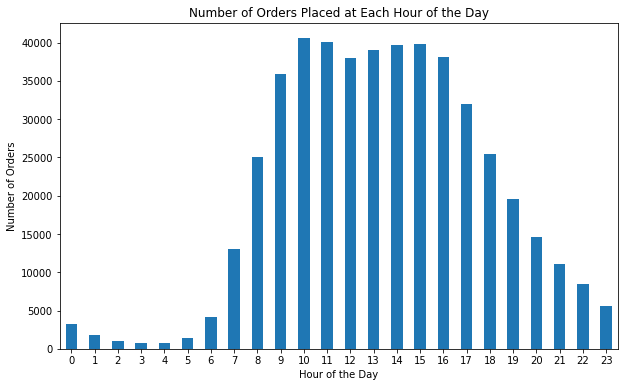

In [36]:
import matplotlib.pyplot as plt

# Counts the number of orders for each hour of the day
hourly_orders = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar')
plt.title('Number of Orders Placed at Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # This makes the x-axis labels more readable
plt.show()

After running the `min()` and `max()` values on the `order_hour_of_day` and `order_dow `columns, we can safely assume that the values in the orders dataframe are sensible. Since there are 24 hours in a day and 7 days in a week, the  values from 0 to 6 and 0 to 23 make sense for each column.

We then create a variable called hourly_orders which counts the number of orders for each day.

Next we use a bar plot to see what hours of the day do people shop for the most. The x-axis has ticks with each hour of the day, while the y-axis shows the number of orders made. Here we see that the number of orders in one hour peaks at 10:00 AM and starts to decline again at 5:00PM. We can see that people place most orders between the 9th and 17th hours of the day.

### [A3] What day of the week do people shop for groceries?

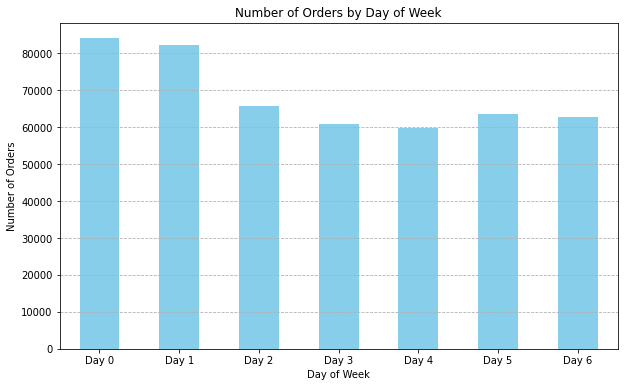

In [37]:
import matplotlib.pyplot as plt
# Group the data by 'order_dow' and count the number of orders for each day
orders_per_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
# Sort the results just in case (this step might be redundant if the data is already sorted)
orders_per_day = orders_per_day.sort_index()
# Plotting
plt.figure(figsize=(10, 6))
orders_per_day.plot(kind='bar', color='skyblue')
plt.title("Number of Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(ticks=range(0, 7), labels=['Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6'], rotation='horizontal')
plt.grid(axis='y', linestyle='--')
plt.show()

We want to figure out what day do people shop the most for groceries. We first have to group the data by the `order_dow column`, and then count the number of orders for each day. We then sort each day by the index and plot the data using a bar chart. 

We can see that `Day 0` is the day that people do most of their shopping with `Day 1` coming in at a very close second place.

### [A4] How long do people wait until placing another order?

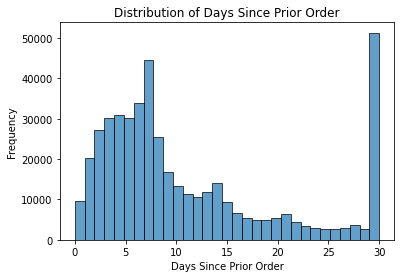

In [38]:
import matplotlib.pyplot as plt
plt.hist(df_instacart_orders['days_since_prior_order'].dropna(), bins=31, edgecolor='k', alpha=0.7)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.show()

To figure out how long people wait until placing another order we have to look at the values from the `days_since_prior_order` chart. We remove missing values using the `dropna()` method and set our bins to 31 to make the day readable and more conclusive. We set our x-axis to Days Since Prior Order and the y-axis to Frequency, which counts how many times the days_since_prior_order value occurs.

We can conclude that most seperation of days between order placements either occur within 7 days or on an monthly basis (30 days).

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [39]:
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]

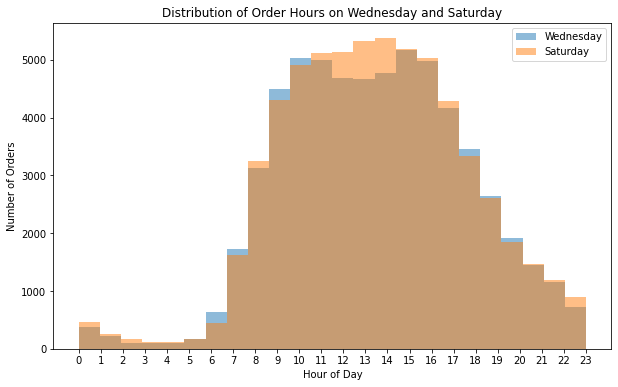

In [40]:
import matplotlib.pyplot as plt
# Assuming wednesday_orders and saturday_orders are your filtered DataFrames
wednesday_hours = wednesday_orders['order_hour_of_day']
saturday_hours = saturday_orders['order_hour_of_day']
# Plotting the histograms on the same figure
plt.figure(figsize=(10,6))  # Adjust the size as needed
plt.hist(wednesday_hours, bins=24, alpha=0.5, label='Wednesday')
plt.hist(saturday_hours, bins=24, alpha=0.5, label='Saturday')
# Adding labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Hours on Wednesday and Saturday')
plt.xticks(range(0,24))  # Adjust x-axis ticks
# Adding a legend to differentiate the histograms
plt.legend()
# Displaying the plot
plt.show()

To determine the difference in what hours of the day are customers placing orders most between Wednesday and Saturday, we will first filter the `order_dow` column. We assume that the indices 0-6 coincides with the order of the days of the week, so we set Wednesday as index 3, and Saturday as index 6. 

We then use those filters and save them in variables to use in a histogram. We see from the histogram that for Saturday most orders are placed in the late morning and afternoon hours between 9-16. While on Wednesdays, orders peak between hours 9-11 and 15-16. 


### [B2] What's the distribution for the number of orders per customer?

In [41]:
order_count_per_customer = df_instacart_orders.groupby('user_id')['order_id'].count()

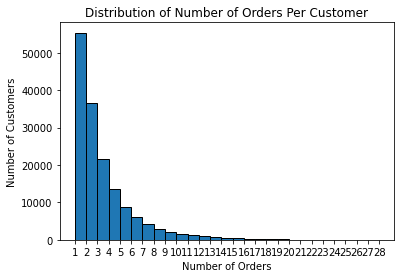

In [42]:
order_count_per_customer.plot(kind='hist', bins=range(1, order_count_per_customer.max() + 1), edgecolor='black')
plt.title('Distribution of Number of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(range(1, order_count_per_customer.max() + 1)) # Adjust the ticks to match the number of orders
plt.show()

In order to see the distribution for the number of orders per customer, we will first group by the customer's `user_id` and count the values of how many orders they made by using the `order_id`. This will return each order count per customer. 

Next we create a histogram that shows how many customers made a specific amount of orders. 

From the histogram that was created, we can conclude that most instacart customers have made only one order and the number of customers who have made more than 1 order exponentially decreases as you travel along the x axis. 

### [B3] What are the top 20 popular products (display their id and name)?

In [43]:
product_counts = df_order_products['product_id'].value_counts().head(20)
print(product_counts)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [44]:
top_20_products = df_products.loc[df_products['product_id'].isin(product_counts.index)]
print(top_20_products)

       product_id              product_name  aisle_id  department_id
5875         5876             organic lemon        24              4
8276         8277  apple honeycrisp organic        24              4
13175       13176    bag of organic bananas        24              4
16796       16797              strawberries        24              4
21136       21137      organic strawberries        24              4
21902       21903      organic baby spinach       123              4
22934       22935      organic yellow onion        83              4
24851       24852                    banana        24              4
24963       24964            organic garlic        83              4
26208       26209                     limes        24              4
27844       27845        organic whole milk        84             16
27965       27966       organic raspberries       123              4
28203       28204        organic fuji apple        24              4
39274       39275       organic bl

We found the top 20 popular products by filtering on the order_products dataframe's product_id column and applying the value_counts() method and returning the first 20 rows and saving it in a variable called product_counts. 

Using the .loc() and filtering method isin() we find the names of the top 20 products by indexing the products_counts variable we created.



### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [45]:
import pandas as pd


In [46]:
import matplotlib.pyplot as plt

The average number of items per order is: 10.098983215049127
The median number of items per order is: 8.0


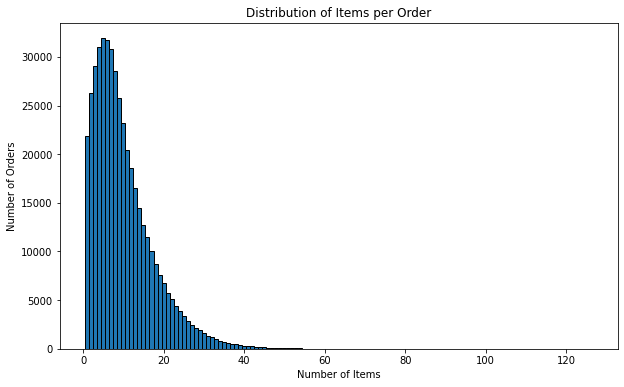

In [47]:
# Calculate the count of products per order
items_per_order = df_order_products.groupby('order_id')['product_id'].count()
# Check the average and median number of items per order
average_items = items_per_order.mean()
median_items = items_per_order.median()
print(f"The average number of items per order is: {average_items}")
print(f"The median number of items per order is: {median_items}")
# Plot the distribution of items per order
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 1), align='left', edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

To determine how many items people typically buy in one order, we first have to count how many products are in each order by grouping the order_products dataframe by the `order_id` column and then counting each `product_id` in each individual order. We then save that count into a variable called items_per_order.

We then find the mean and median of the `items_per_order` by using the `mean()` and `median()` methods.

To see the distribution on a plot, we use a histogram to check if our mean and median values match with the values returned from our calculations. 

From the histogram and our calculations, we see that the average number of items in each order is around 10 and the median is 8.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [48]:
import pandas as pd

In [49]:
# Count how often each product has been reordered
reordered_counts = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()
reordered_counts_df = reordered_counts.reset_index()
reordered_counts_df.columns = ['product_id', 'reordered_count']

In [50]:
# top 20 most reordered products
top_reordered_20 = reordered_counts_df.head(20)

In [51]:
# Merge with the products DataFrame to get product names
top_reordered_20 = top_reordered_20.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
print(top_reordered_20)

    product_id  reordered_count              product_name
0        24852            55763                    banana
1        13176            44450    bag of organic bananas
2        21137            28639      organic strawberries
3        21903            26233      organic baby spinach
4        47209            23629      organic hass avocado
5        47766            18743           organic avocado
6        27845            16251        organic whole milk
7        47626            15044               large lemon
8        27966            14748       organic raspberries
9        16797            13945              strawberries
10       26209            13327                     limes
11       22935            11145      organic yellow onion
12       24964            10411            organic garlic
13       45007            10076          organic zucchini
14       49683             9538            cucumber kirby
15       28204             8989        organic fuji apple
16        8277

Here we can see that most of the reordered products are organic foods, specifically fruits and vegetables.